# Lecture 13: The Soft-Margin Support Vector Machine  
***

<img src="figs/cogs.jpg" width=1100 height=50>

**Reminder**: Scroll down and execute the Helper Functions at the bottom

<br>

### Problem 1: Soft-Margin SVM Example
***

Suppose you have the following labeled data set (assume here that red corresponds to $y=1$ and blue corresponds to $y = -1$) and suppose the SVM decision boundary is defined by the weights ${\bf w} = [-1/4, ~ 1/4]^T$ and $b = -1/4$. 


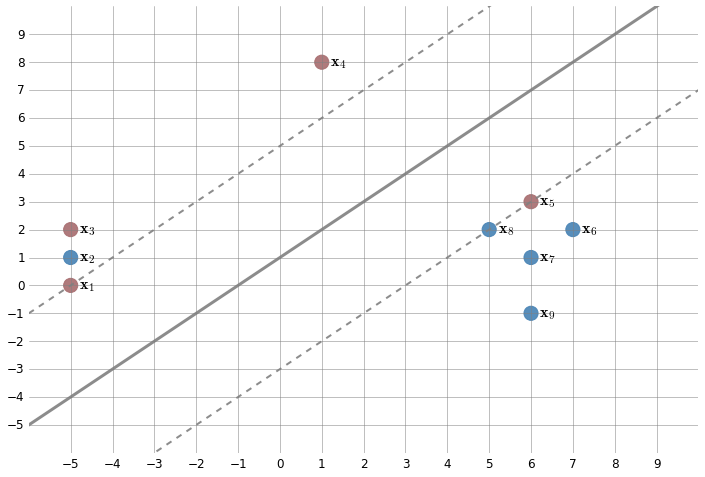

In [42]:
prob1plot()

**Q**: Which training examples are the support vectors (be careful here)? 

**Q**: Which training examples have non-zero slack? 

**Q**: Compute the slack $\xi_i$ associated with the misclassified points. 

**Q**: What is the interpretation of these slack variables? 

<br>

### Problem 2: General Soft-Margin Trivia
***

**Q**: Suppose you have determined the optimal dual parameters (the $\alpha$'s).  We've seen how we can recover the primal weight vector, but how could you recover the bias term $b$? 

<br>

### Problem 3: The Margin vs. Slackness Tradeoff 
***

The following function computes the SVM decision function for varying values of $C$ and choice of power on the slack variables.  Play with $C$ and the loss function and see what happens to the decision boundary.  Then answer the questions below.


Margin M =  0.305730951413


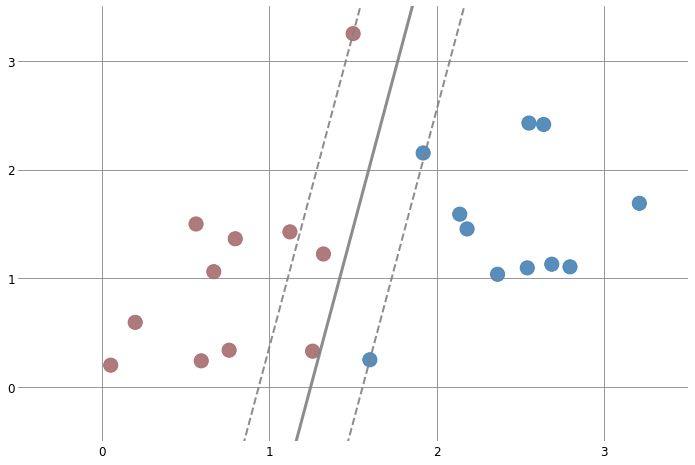

In [19]:
prob2(C=10, loss="hinge") 
# Replace "hinge" with "squared_hinge" to square 
# slack variables in objective function

Margin M =  0.594624461771


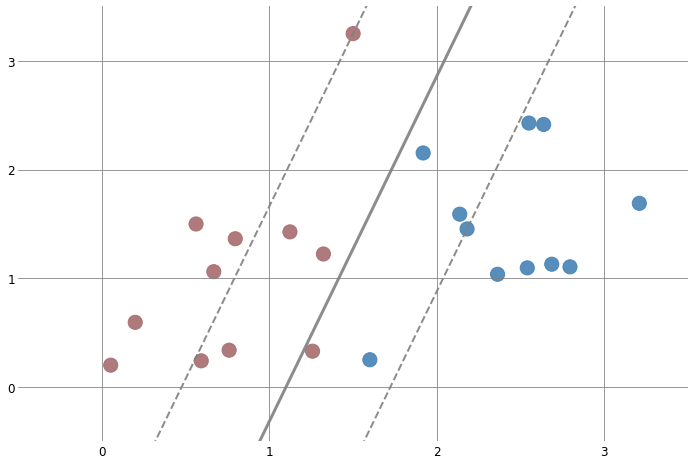

In [7]:
prob2(C=1.0, loss="hinge") 
# Replace "hinge" with "squared_hinge" to square 
# slack variables in objective function

**Q**: What are your observations about the relationship between the size of $C$ and the size of the margin? 

**Q**: Given a Soft-Margin SVM model with linearly separable data, how could you simulate the effects of a Hard-Margin SVM? 

**Q**: For fixed $C$ how do the different powers on the slack variables affect the margin?  Is this counterintuitive?  Can you think of a situation when this wouldn't be the case?  

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### Helper Functions
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
%matplotlib inline

def prob1plot():
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    X = np.array([
            [-5,0], 
            [-5,1], 
            [-5,2],
            [ 1,8],
            [ 5,2],
            [ 6,3],
            [ 6,1],
            [ 6,-1],
            [ 7,2],
        ])
    y = np.array([
             1,
            -1,
             1,
             1,
            -1,
             1,
            -1,
            -1,
            -1,
        ])
    colors = [mycolors["blue"] if yi==-1 else mycolors["red"] for yi in y]
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    x = np.linspace(-6,10,2) 
    plt.plot(x, x + 1, color="gray", lw=3, alpha=0.9)
    plt.plot(x, x + 5, color="gray", lw=2, ls="--", alpha=0.9)
    plt.plot(x, x - 3, color="gray", lw=2, ls="--", alpha=0.9)
    ax.text(X[0,0]+.2,X[0,1]-.1,r"${\bf x}_1$", fontsize=16)
    ax.text(X[1,0]+.2,X[1,1]-.1,r"${\bf x}_2$", fontsize=16)
    ax.text(X[2,0]+.2,X[2,1]-.1,r"${\bf x}_3$", fontsize=16)
    ax.text(X[3,0]+.2,X[3,1]-.1,r"${\bf x}_4$", fontsize=16)
    ax.text(X[4,0]+.2,X[4,1]-.1,r"${\bf x}_8$", fontsize=16)
    ax.text(X[5,0]+.2,X[5,1]-.1,r"${\bf x}_5$", fontsize=16)
    ax.text(X[6,0]+.2,X[6,1]-.1,r"${\bf x}_7$", fontsize=16)
    ax.text(X[7,0]+.2,X[7,1]-.1,r"${\bf x}_9$", fontsize=16)
    ax.text(X[8,0]+.2,X[8,1]-.1,r"${\bf x}_6$", fontsize=16)
    ax.xaxis.grid(True, color="gray", ls='-')
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9 ], fontsize=12)
    plt.yticks([-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9 ], fontsize=12)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    plt.xlim([-6,10])
    plt.ylim([-6,10])
    
def prob2(C=1.0, loss="hinge"):
    
    np.random.seed(1239)
    
    X = np.zeros((22,2))
    X[0:10,0]  = 1.5*np.random.rand(10) 
    X[0:10,1]  = 1.5*np.random.rand(10)
    X[10:20,0] = 1.5*np.random.rand(10) +  1.75
    X[10:20,1] = 1.5*np.random.rand(10) +  1
    X[20,0] = 1.5
    X[20,1] = 3.25
    X[21,0] = 1.6
    X[21,1] = 0.25
    
    y = np.ones(22)
    y[10:20] = -1 
    y[20] = 1
    y[21] = -1
    
    clf = LinearSVC(C=C, loss=loss)
    clf.fit(X,y)
    b = clf.intercept_
    w = clf.coef_[0]
    
    # Plot data 
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    colors = [mycolors["blue"] if yi==-1 else mycolors["red"] for yi in y]
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    ax.xaxis.grid(True, color="gray", ls='-')
    
    # Plot SVM boundaries 
    x = np.linspace(-6,10, 10)
    plt.plot(x, (-w[0]/w[1])*x -b/w[1], color="gray", lw=3, alpha=0.9)
    plt.plot(x, (-w[0]/w[1])*x -b/w[1] + 1/w[1], color="gray", lw=2, ls="--", alpha=0.9)
    plt.plot(x, (-w[0]/w[1])*x -b/w[1] - 1/w[1], color="gray", lw=2, ls="--", alpha=0.9)
    
    # Plot Settings 
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks([0,1,2,3], fontsize=12)
    plt.yticks([0,1,2,3], fontsize=12)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    plt.xlim([-0.5,3.5])
    plt.ylim([-0.5,3.5])
    
    # Print the margin
    normW = np.linalg.norm(w)
    M = 1.0/normW 
    print("Margin M = ", M)